<a href="https://colab.research.google.com/github/Mayur-666/Computer_Vision/blob/main/Assignment_1_LocalBinaryPattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

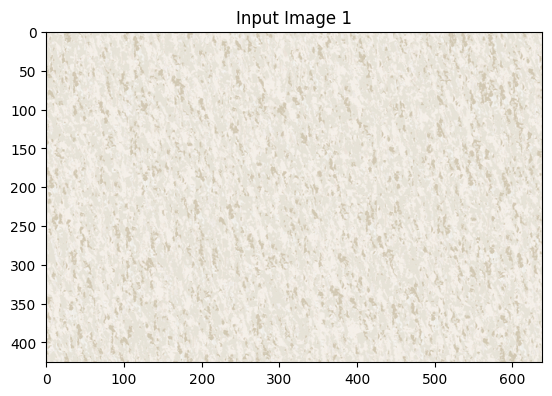

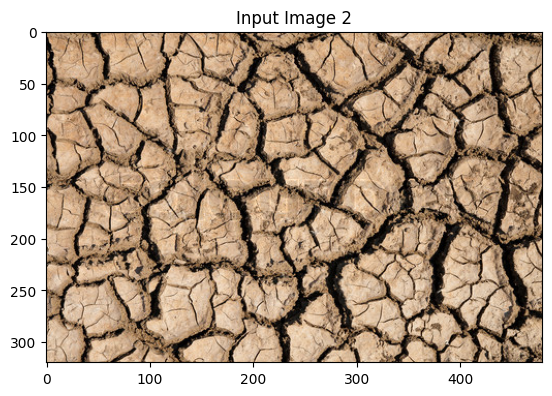

In [2]:
url_1 = "https://i.ibb.co/Kxbc9RQ/Whats-App-Image-2024-01-25-at-10-32-53-PM-1.jpg"
url_2 = "https://i.ibb.co/V2pqZSL/Whats-App-Image-2024-01-25-at-10-32-53-PM.jpg"

image_1 = io.imread(url_1)
image_2 = io.imread(url_2)

plt.imshow(image_1)
plt.title("Input Image 1")
plt.show()
plt.imshow(image_2)
plt.title("Input Image 2")
plt.show()

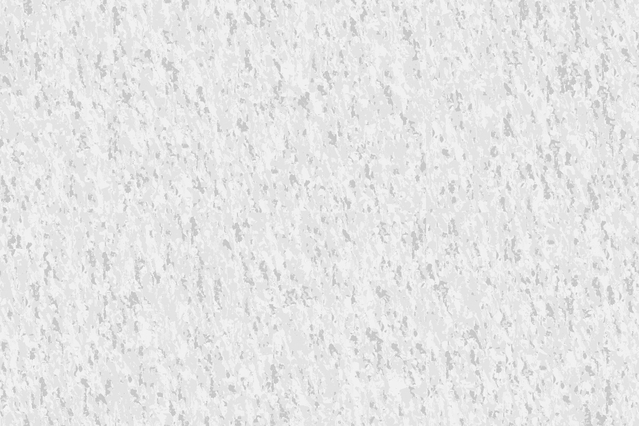

In [3]:
#converting image_1 to grayscale format
imgGray_1 = cv.cvtColor(image_1, cv.COLOR_RGB2GRAY)
cv2_imshow(imgGray_1)

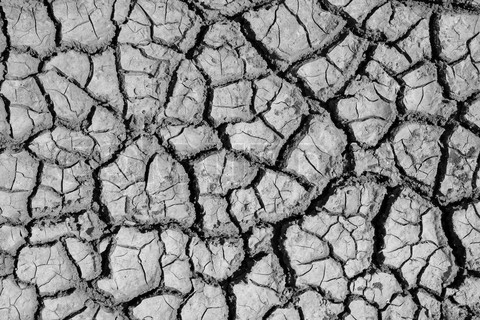

In [4]:
#converting image_2 to grayscale format
imgGray_2 = cv.cvtColor(image_2, cv.COLOR_RGB2GRAY)
cv2_imshow(imgGray_2)

In [5]:
#function to compare central value with nearby given cell value
def compareValues(image, centerValue, x, y):
  newCenteralValue = 0
  try:
    if image[x][y] >= centerValue:
      newCenteralValue = 1
  except:
    pass
  return newCenteralValue

In [6]:
def getLBP(image, x, y):
  center = image[x][y]
  binaryArray = []     #compare nearby values and put 0 or 1 in this array

  #top value
  binaryArray.append(compareValues(image, center,[x-1],y))
  #top left value
  binaryArray.append(compareValues(image, center, x-1,y-1))
  #top right value
  binaryArray.append(compareValues(image, center, x-1,y+1))

  #left value
  binaryArray.append(compareValues(image, center, x,y-1))
  #right value
  binaryArray.append(compareValues(image, center, x,y+1))

  #bottom value
  binaryArray.append(compareValues(image, center, x+1,y))
  #bottom left value
  binaryArray.append(compareValues(image, center, x+1,y-1))
  #bottom right value
  binaryArray.append(compareValues(image, center, x+1,y+1))

  powers = [1, 2, 4, 8, 16, 32, 64, 128]

  value = 0

  for i in range(len(binaryArray)):
    value += binaryArray[i]*powers[i]

  return value

In [10]:
def showLBPImage(image, grayImage):
	height, width, _ = image.shape
	img_lbp = np.zeros((height, width), np.uint8)

	for i in range(0, height):
		for j in range(0, width):
			img_lbp[i, j] = getLBP(grayImage, i, j)

	plt.imshow(image)
	plt.title("Original Image")
	plt.show()
	plt.imshow(img_lbp, cmap ="gray")
	plt.title("LBP Image")
	plt.show()

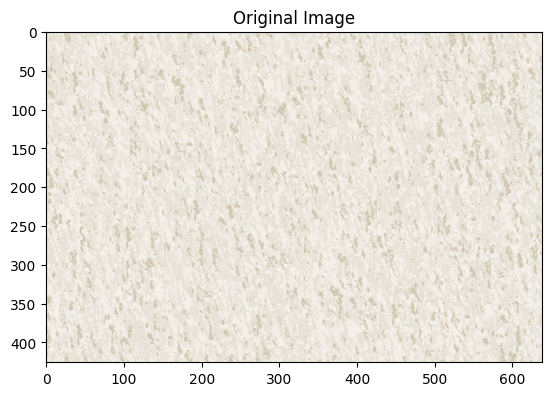

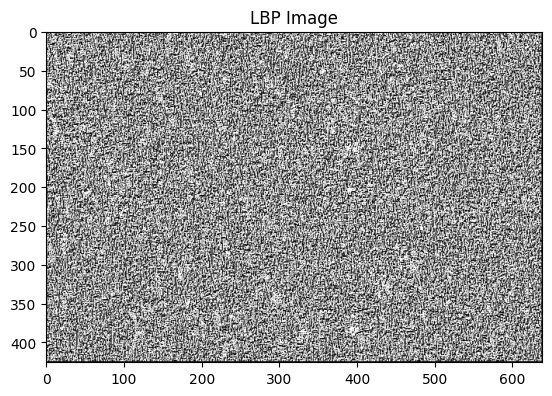

In [11]:
showLBPImage(image_1, imgGray_1)

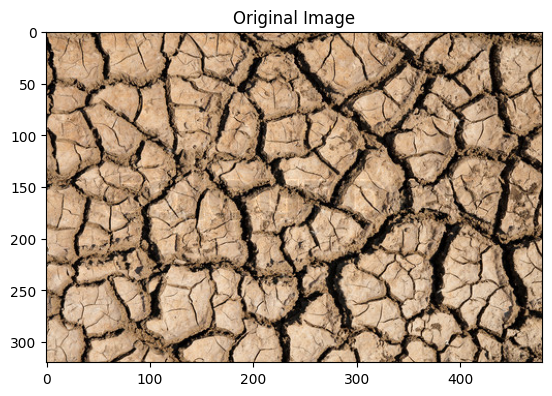

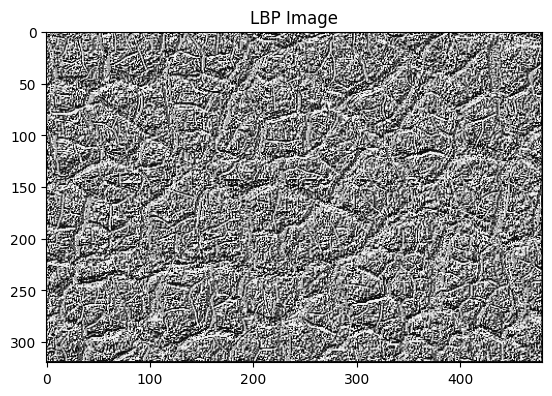

In [12]:
showLBPImage(image_2, imgGray_2)